# Twitter Project

In [2]:
pip install gensim python-twitter matplotlib wordcloud --upgrade

     |████████████████████████████████| 23.4MB 6.9MB/s eta 0:00:01
Requirement already up-to-date: python-twitter in /home/mantunes/git/python201/venv/lib/python3.8/site-packages (3.5)
Requirement already up-to-date: matplotlib in /home/mantunes/git/python201/venv/lib/python3.8/site-packages (3.1.3)
Requirement already up-to-date: wordcloud in /home/mantunes/git/python201/venv/lib/python3.8/site-packages (1.6.0)
     |████████████████████████████████| 71kB 435kB/s eta 0:00:011
     |████████████████████████████████| 1.4MB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.0MB/s eta 0:00:011
     |████████████████████████████████| 5.9MB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 552kB 2.9MB/s eta 0:00:01
  Running setup.py install for smart-open ... done
  Running setup.py install for gensim ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may n

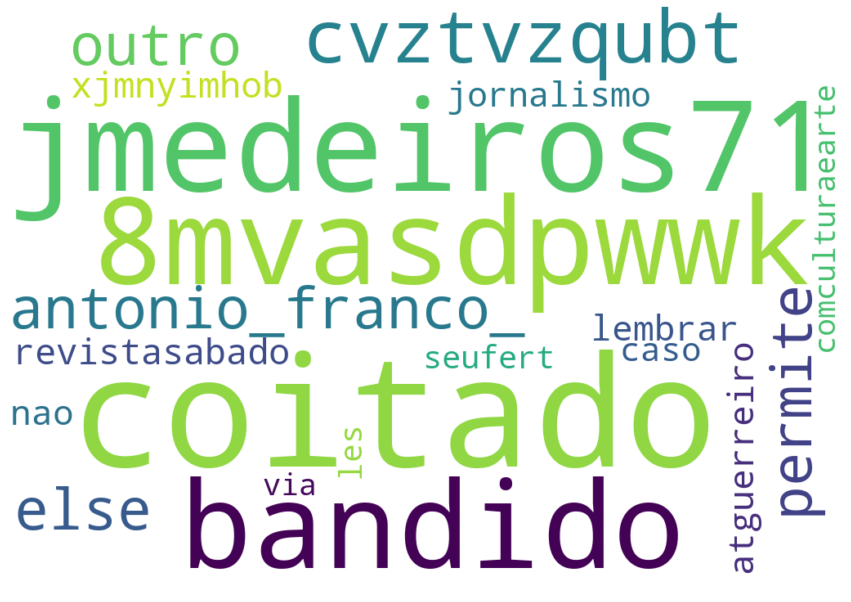

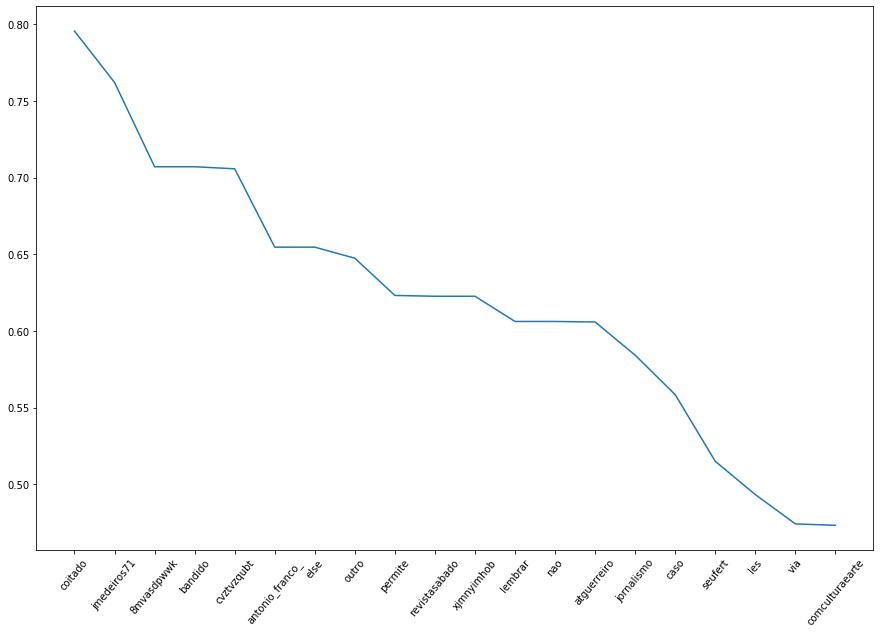

In [36]:

import twitter

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from gensim.corpora import Dictionary
from gensim.models import TfidfModel

import matplotlib.pyplot as plt

from wordcloud import WordCloud

# Define the search term
term = 'Rui Pinto'

# Define tokenizer and stop words
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('portuguese'))
stop_words.update(set(stopwords.words('english')))
stop_words.add('https')

# Add the search term to the stop word list
for t in term.split():
    stop_words.add(t.lower())

def generate_ngrams(tokens, n=2):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]
    
def scores(vectorizer, tfidf_result, limit=10):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores[:limit]

def display_scores(vectorizer, tfidf_result):
    # http://stackoverflow.com/questions/16078015/
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores:
        print ('{0:50} Score: {1}'.format(item[0], item[1]))

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens if not w.lower() in stop_words]
    tokens = [w for w in tokens if len(w) > 2]
    #bigrams = generate_ngrams(tokens)
    #return tokens + bigrams
    return tokens

api = twitter.Api(consumer_key='2lDgkNXdm03bxodf55vlY5IHo',
                  consumer_secret='w5SaNzPCLyaBL1ieyGpm4uwjan5Y2GDqQjbbSUoBTT5Fl3cLP4',
                  access_token_key='276620312-0oyEjiC76ouJXCWALH5P9L3NXHSQ7kPw75jL9wse',
                  access_token_secret='HuJgudHMikT6VGd13M79GkXf0IdzDw20xyePaM8gHRJgg')

results = api.GetSearch(term=term, count=100)

corpus = []
for r in results:
    corpus.append(tokenize(r.text.lower()))
    
# Build the dictionary
dictionary = Dictionary(corpus) 

# Convert to vector corpus
vectors = [dictionary.doc2bow(text) for text in corpus]

# Build TF-IDF model
tfidf = TfidfModel(vectors)

# Get TF-IDF weights
weights = [tfidf[v] for v in vectors]
weights = [item for sublist in weights for item in sublist]
weights = list(set(weights))

# Replace term IDs with human consumable strings
weights = [(dictionary[pair[0]], pair[1]) for pair in weights]
weights.sort(key=lambda p: p[1], reverse=True)

# Select only k top words
weights = weights[:20]

# Create the dictionary of frequencies
frequencies = {}
for p in weights:
    frequencies[p[0]] = p[1]

# Initialize the cloud
wc = WordCloud(
    background_color="white",
    max_words=2000,
    width=1024,
    height=720,
    stopwords=stop_words
)

# Generate the cloud
wordcloud = wc.generate_from_frequencies(frequencies)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Display a chart with the distribution of weights from the words
x = [v[1] for v in weights]
labels = [v[0] for v in weights]

plt.figure(figsize=(15,10))
plt.xticks(range(0, len(x)), labels=labels, rotation=50)
plt.plot(x)
plt.show()